<a href="https://colab.research.google.com/github/detauportuno/Projeto_Pinturas_PAE/blob/main/Projeto_Pinturas_andre_sampaio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução à inteligência artificial

##Projeto final - Classificação imagens de pinturas de diversos artistas
Este arquivo deve ser entregue até dia 12/06/21. Para isso, adicione o seu RA no título do arquivo.
A finalidade deste projeto é modificar o **classificador** de uma rede neural previamente treinada, onde fica a seu critério escolher qual arquitetura do modelo VGG você irá utilizar.
Será avaliado quais foram as camadas utilizadas, funções de ativação, métodos para evitar *overfitting*, critério de perda, otimizador e quaisquer outros métodos que alterem os hiperparâmetros da rede.

A precisão percentual será calculada pelo algoritmo no final deste arquivo.

###Configuração inicial
Para que possamos baixar o dataset do Kaggle, crie uma conta ou associe sua conta Google. Entre em "My account" clicando no canto superior direito (que seria seu usuário), dentro da sua conta vá até a sessão "API", clique no botão "Create New API Token".

Será feito o download de um arquivo chamado "kaggle.json" que permitirá acesso aos datasets no Kaggle.
Execute a célula a seguir, ela pedirá para que você insira um arquivo, portanto selecione o "kaggle.json" que será usado para fazer o download do dataset.

In [ ]:
# Importação das bibliotecas
import cv2 as cv
import numpy as np
import pandas as pd
import argparse
import numpy as np
from google.colab.patches import cv2_imshow # exibição da imagem
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

Execute a célula a seguir para extrair os dados:

In [ ]:
# Cria uma lista para armazenar os URL das imagens
urls = [# adicionar os URLs, tenho que entender o problema do erro HTTP 403 Forbidden]
# Lê e exibe a imagem
# Loopeia nos URLs da lista, é possível armazenar vários URLs de uma vez

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')


SyntaxError: ignored

### Definição das transformações e tamanho de lote

In [ ]:
# Criando parser de argumento para pegar o image path da linha de comando
ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help="Image Path" )
args = vars(ap.parse_args())
img_path = args['image']

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Leitura da imagem com o opencv
img = cv2.imread(img_path)

# Declaração de variáveis globais
clicked = False
r = g = b = xpos = ypos = 0

# Leitura dos arquivos csv com os pandas e dando nomes para cada coluna
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

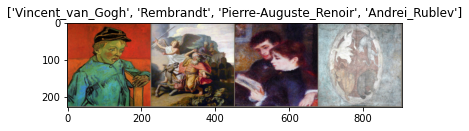

In [ ]:
# Função para calcular a mínima distância de todas as cores e determinar a cor que predomina
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
      d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"])) + abs(B- int(csv.loc[i,"B"]))
      if (d<=minimum):
        minimum = d
        cname = csv.loc[i,"color_name"]
    return cname

In [ ]:
# Função que pega as coordenadas x,y do double-click do mouse
def draw_function(event, x,y,flags,param)
  if event == cv2.EVENT_LBUTTONDBLCLK:
    global b,g,r,xpos,ypos, clicked
    clicked = True
    xpos = x
    ypos = y
    b,g,r = img[y,x]
    b = int (b)
    g = int (g)
    r = int (r)
cv2.namedWindow('image')
cv2.setMouseCallBack('image',draw_function)

### Modelo

Defina seu modelo utilizando o modelo [VGG](https://pytorch.org/docs/stable/torchvision/models.html) **pré-treinado**  e altere o classificador da rede neural.

In [ ]:
while(1):
  cv2.imshow("image",img)
  if (clicked):
    # Retângulo do cv2(image, startpoint, endpoint, color, thickness)-1 cabe em todo retângulo
    cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

    # Criando string de texto para exibição(Nome da cor e valores RGB)
    text = getColorName(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)

    # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
    cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

    # Para cada cor muito fraca, exibiremos o texto em cor preta
    if(r+g+b>=600):
      cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
    clicked=False
  # Quebrar o loop quando usuario apertar esc
  if cv2.waitKey(20) & 0xFF ==27:
    break
cv2.destroyAllWindows()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


### Treinamento

In [ ]:
model = train_model(model, criterion, optimizer, exp_lr_scheduler,
                    num_epochs=5)

NameError: ignored

### Carregar o modelo

In [ ]:
# Carrega o modelo
file_name = "model.pt"
model.load_state_dict(torch.load(file_name))

<All keys matched successfully>

### Avaliação do projeto

In [ ]:
# Faça o teste final para avaliação da rede
test_loss = 0.0
class_correct = list(0. for i in range(len(class_names)))
class_total = list(0. for i in range(len(class_names)))
batch_size = 4
train_on_gpu = torch.cuda.is_available()
model.eval()

for batch_idx, (data, target) in enumerate(data_loader['test']):
    # Move os tensores para a GPU se disponivel
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # Inferência
    output = model(data)
    # Calcula a perda
    loss = criterion(output, target)
    # Atualiza a perda
    test_loss += loss.item()*data.size(0)
    # Convert as probabilidades para classe e escolhe somente a maior
    _, pred = torch.max(output, 1)
    # Compara as predições com a classe verdadeira
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # Calcula a precisão para cada objeto
    for i in range(batch_size):
        if(correct.size==batch_size):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

# Perda média
test_loss = test_loss/len(data_loader['test'].dataset)
print('Perda de teste: {:.6f}\n'.format(test_loss))

for i in range(len(class_names)):
    if class_total[i] > 0:
      name = class_names[i].capitalize()
      print('Precisão de teste de %5s: %2d%% (%2d/%2d)' % (
            name, 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Precisão de teste de %5s: N/A (sem dados de treinamento)' % (class_names[i]))
overall_acc = 100. * np.sum(class_correct) / np.sum(class_total)
print('\nPrecisão de teste geral: %6.2f%% (%3d/%3d)' % (
    overall_acc,
    np.sum(class_correct), np.sum(class_total)))

Perda de teste: 0.165150

Precisão de teste de Albrecht_duтха├кrer: 10% ( 3/28)
Precisão de teste de Albrecht_du╠иrer: 65% (27/41)
Precisão de teste de Alfred_sisley: 100% (13/13)
Precisão de teste de Amedeo_modigliani: 93% (14/15)
Precisão de teste de Andrei_rublev: 69% ( 9/13)
Precisão de teste de Andy_warhol: 100% (11/11)
Precisão de teste de Camille_pissarro: 42% ( 3/ 7)
Precisão de teste de Caravaggio: 80% ( 4/ 5)
Precisão de teste de Claude_monet: 75% ( 3/ 4)
Precisão de teste de Diego_rivera: 50% ( 2/ 4)
Precisão de teste de Diego_velazquez: 50% ( 8/16)
Precisão de teste de Edgar_degas: 93% (68/73)
Precisão de teste de Edouard_manet: 36% ( 4/11)
Precisão de teste de Edvard_munch: 30% ( 3/10)
Precisão de teste de El_greco: 72% ( 8/11)
Precisão de teste de Eugene_delacroix: 100% ( 1/ 1)
Precisão de teste de Francisco_goya: 37% ( 9/24)
Precisão de teste de Frida_kahlo: 58% ( 7/12)
Precisão de teste de Georges_seurat: 33% ( 1/ 3)
Precisão de teste de Giotto_di_bondone: 73% (14/19)
P

### Insira sua imagem (opcional)

In [ ]:
 files.upload()

In [ ]:
from PIL import Image

# Carrega imagem
image = Image.open("download.jpeg")
# Aplica transformações
input = data_transforms['test'](image)
# Entra em modo de avaliação
model.eval()
# Muda o modelo para a CPU
model.to(torch.device("cpu"))
# Faz a inferência
logit = model(input.unsqueeze(0))
# Cria uma "camada" de softmax
softmax = nn.Softmax(dim=1)
# Aplica saida
out = softmax(logit)
# Analisa saida
value, indice = out.topk(1)
# Mostra probabilidade e classe
print("Probabilidade de {} de ser {}".format(float(value),class_names[int(indice)]))